In [1]:
import os, sys
import pandas as pd
import pandas_profiling
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def mytable(data):
    nulls = pd.DataFrame(data.isnull().sum()/data.shape[0]*100, columns=['% de datos nulos'])
    ceros = pd.DataFrame((data==0).sum()/data.shape[0]*100, columns=['% de ceros'])
    tipo = pd.DataFrame(data.dtypes,columns=['Tipo de datos'])
    val = pd.DataFrame(data.nunique(),columns=['# de valores diferentes'])
    mis_val_table = pd.concat([nulls, ceros,tipo, val], axis=1)
    return mis_val_table

In [3]:
def eliminar_coma(x):
    x=str(x).replace(',','.')
    return x

# Base de datos Daily

In [4]:
name = r"C:\Users\anavr\OneDrive - Universidad de los Andes\PhD\Courses\Ciencia de Datos Aplicada\Proyecto\Codes\Daily.csv"

daily =pd.read_csv(name,sep='|',error_bad_lines=False, warn_bad_lines= False,index_col=False,header=0, low_memory=False)

In [5]:
daily.shape

(396887, 20)

In [6]:
daily.duplicated().sum()

505

In [7]:
daily.drop_duplicates()

,id_sitio,corte_evento,Daily_Date,VolUnCorrected,VolCorrected,Pressure,Temperature,MaxPressure,MaxPressureTime,MinPressure,MinPressureTime,MaxFlow,maxFlowTime,MinFlow,MinFlowTime,MaxTemp,maxTempTime,MinTemp,MinTempTime,id_RTU
0,34,False,2013-08-19 23:59:59,"39,390000000000001","727,25",NaN,NaN,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,81.0
1,163,False,2013-08-21 23:59:59,"1434,9300000000001","24170,799999999999",NaN,NaN,0.0,2013-08-21 00:00:00,0.0,2013-08-21 00:00:00,0.0,2013-08-21 00:00:00,0.0,2013-08-21 00:00:00,0.0,2013-08-21 00:00:00,0.0,2013-08-21 00:00:00,3.0
2,40,False,2013-08-19 23:59:59,"7709,2600000000002","69097,570000000007",NaN,NaN,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,98.0
3,41,False,2013-08-19 23:59:59,"404,13999999999999","7004,7700000000004",NaN,NaN,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,89.0
4,50,False,2013-08-19 23:59:59,"3296,0100000000002","15331,190000000001",NaN,NaN,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,0.0,2013-08-19 00:00:00,87.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396882,424,False,2018-01-22 23:59:59,69,523,"101,33","25,870000000000001",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1899.0
396883,425,False,2018-01-22 23:59:59,265,584,"23,5","22,379999999999999",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4437.0
396884,426,False,2018-01-22 23:59:59,1538,10713,"91,629999999999995","23,23",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2470.0
396885,427,False,2018-01-22 23:59:59,57,275,"58,859999999999999","18,879999999999999",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1518.0


In [8]:
daily.shape

(396887, 20)

In [9]:
mytable(daily)

,% de datos nulos,% de ceros,Tipo de datos,# de valores diferentes
id_sitio,0.000000,0.000000,int64,306
corte_evento,0.000000,100.000000,bool,1
Daily_Date,0.000000,0.000000,object,1907
VolUnCorrected,0.013102,0.000000,object,114051
VolCorrected,0.017385,0.000000,object,243108
Pressure,0.096753,0.000000,object,21409
Temperature,0.096753,0.000000,object,4189
MaxPressure,97.703628,2.296372,float64,1
MaxPressureTime,97.703628,0.000000,object,92
MinPressure,97.703628,2.296372,float64,1


In [10]:
daily['VolUnCorrected']=daily['VolUnCorrected'].apply(eliminar_coma)
daily['VolCorrected']=daily['VolCorrected'].apply(eliminar_coma)
daily['Pressure']=daily['Pressure'].apply(eliminar_coma)
daily['Temperature']=daily['Temperature'].apply(eliminar_coma)


convert = {'id_sitio':'object',
          'VolUnCorrected':float,
          'VolCorrected':float,
          'Pressure':float,
          'Temperature':float,
          'MaxPressure':float,
          'MinPressure':float,
          'MaxFlow':float,
          'MinFlow':float,
          'MaxTemp':float,
          'MinTemp':float,
          'id_RTU':'object'}
daily = daily.astype(convert)
daily.dtypes

id_sitio            object
corte_evento          bool
Daily_Date          object
VolUnCorrected     float64
VolCorrected       float64
Pressure           float64
Temperature        float64
MaxPressure        float64
MaxPressureTime     object
MinPressure        float64
MinPressureTime     object
MaxFlow            float64
maxFlowTime         object
MinFlow            float64
MinFlowTime         object
MaxTemp            float64
maxTempTime         object
MinTemp            float64
MinTempTime         object
id_RTU              object
dtype: object

In [11]:
IDs_Sitio_daily = daily.id_sitio.unique()
print('Hay {} id_sitio diferentes en la base de datos de daily'.format(len(IDs_Sitio_daily)))
print('Estos son:\n')
print(IDs_Sitio_daily)

Hay 306 id_sitio diferentes en la base de datos de daily
Estos son:

[34 163 40 41 50 56 58 59 60 64 65 67 69 70 72 73 74 75 78 80 86 87 90 91
 92 94 95 97 98 99 100 101 103 104 105 111 112 113 129 151 152 153 154 155
 156 157 158 159 161 162 164 165 166 168 169 170 42 51 71 76 102 106 124
 167 131 132 160 35 36 37 66 81 88 107 127 130 79 89 96 108 115 116 117
 119 120 121 122 125 126 133 135 171 176 53 62 16 18 45 46 47 48 49 52 57
 118 26 77 39 301 303 304 305 306 307 309 310 311 312 314 315 316 318 319
 320 321 323 324 325 327 329 330 331 332 333 334 335 336 338 339 340 341
 342 343 344 346 347 348 349 350 351 352 353 354 355 356 357 358 359 361
 363 364 365 366 367 368 369 370 372 373 374 136 328 362 308 172 173 174
 14 25 44 55 7 29 2 4 5 6 8 9 10 11 17 19 20 21 22 24 27 28 30 31 32 33 43
 54 137 13 12 302 177 63 371 376 345 150 114 381 317 382 123 138 140 142
 143 360 383 384 378 385 386 375 387 388 377 389 391 390 38 392 322 393
 380 3 23 379 313 15 337 326 144 145 141 146 61 68

Los ```id_sitio``` a seleccionar están desde el 151 al 170. Estos fueron seleccionado teniendo en cuenta la similitud en sus características. De esta forma queda la siguiente base de datos:



In [12]:
daily = daily[['id_sitio','Daily_Date','VolUnCorrected','VolCorrected','Pressure','Temperature','id_RTU']]
daily.head()

,id_sitio,Daily_Date,VolUnCorrected,VolCorrected,Pressure,Temperature,id_RTU
0,34,2013-08-19 23:59:59,39.39,727.25,NaN,NaN,81
1,163,2013-08-21 23:59:59,1434.93,24170.80,NaN,NaN,3
2,40,2013-08-19 23:59:59,7709.26,69097.57,NaN,NaN,98
3,41,2013-08-19 23:59:59,404.14,7004.77,NaN,NaN,89
4,50,2013-08-19 23:59:59,3296.01,15331.19,NaN,NaN,87


In [13]:
mytable(daily)

,% de datos nulos,% de ceros,Tipo de datos,# de valores diferentes
id_sitio,0.000000,0.000000,object,306
Daily_Date,0.000000,0.000000,object,1907
VolUnCorrected,0.013102,5.477126,float64,114051
VolCorrected,0.017385,5.358452,float64,243108
Pressure,0.096753,1.574756,float64,21409
Temperature,0.096753,1.444492,float64,4189
id_RTU,0.066014,0.000000,object,310


## Se crea una base de datos con todo el conjunto de interés

In [46]:
lista = list(range(151,171))
#lista.remove(168)
data1 = daily[daily['id_sitio'].isin(lista)]
data1.head()

,id_sitio,Daily_Date,VolUnCorrected,VolCorrected,Pressure,Temperature,id_RTU
1,163,2013-08-21 23:59:59,1434.93,24170.80,NaN,NaN,3
39,151,2013-08-19 23:59:59,995.00,16940.71,NaN,NaN,17
40,152,2013-08-19 23:59:59,650.00,10917.31,NaN,NaN,2
41,153,2013-08-19 23:59:59,664.01,11355.21,NaN,NaN,8
42,154,2013-08-19 23:59:59,370.00,6238.07,NaN,NaN,13


In [47]:
IDs_Sitio_daily1 = data1.id_sitio.unique()
print('Hay {} id_sitio diferentes en la base de datos de daily'.format(len(IDs_Sitio_daily1)))
print('Estos son:\n')
print(IDs_Sitio_daily1)

Hay 20 id_sitio diferentes en la base de datos de daily
Estos son:

[163 151 152 153 154 155 156 157 158 159 161 162 164 165 166 168 169 170
 167 160]


Text(0.5, 0.98, 'Grupo de interés')

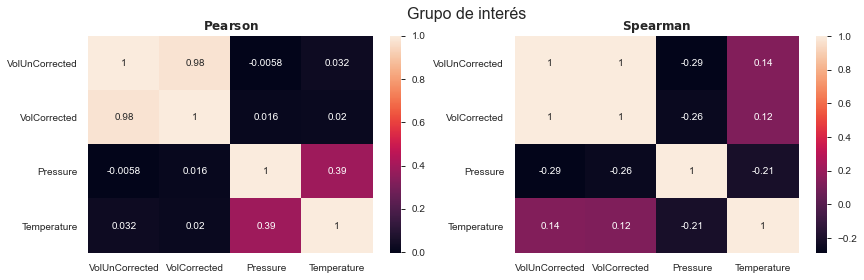

In [48]:
numer = data1.select_dtypes([float])
objeto= data1.select_dtypes(['object'])

fig = plt.figure(figsize =(14,4))
plt.subplot(1,2,1)
sns.heatmap(numer.corr(method ='pearson'),annot = True)
plt.title(r'$\bf{Pearson}$')
plt.subplot(1,2,2)
sns.heatmap(numer.corr(method ='spearman'),annot = True)
plt.title(r'$\bf{Spearman}$')
fig.suptitle('Grupo de interés', fontsize=16)

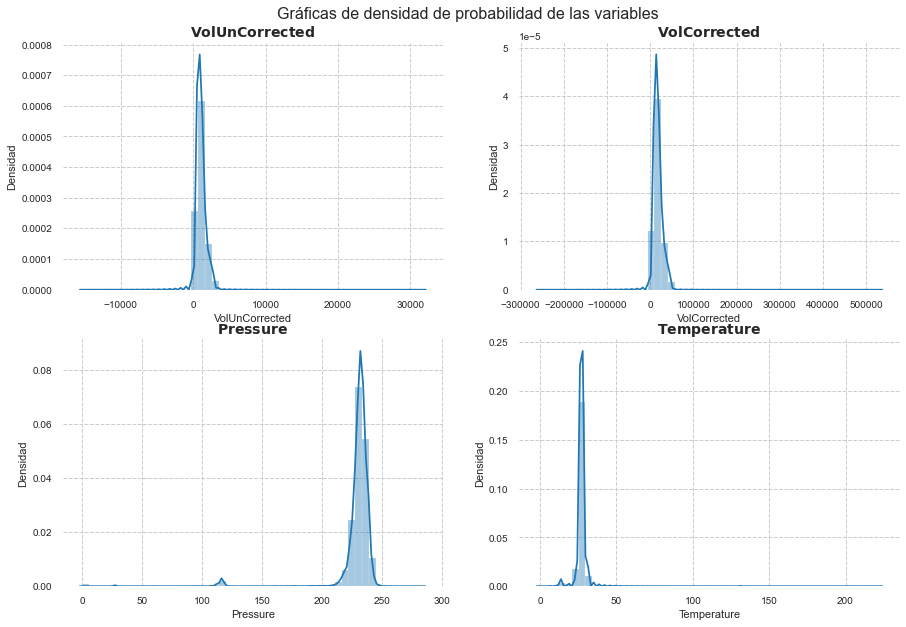

In [49]:
variables = ['VolUnCorrected','VolCorrected','Pressure','Temperature']
f = plt.figure(figsize=(15,10))
f.suptitle('Gráficas de densidad de probabilidad de las variables', y=0.93, fontsize=16)

cont = 1
for v in variables:
    if cont == 2:
        x = 'PSI'
    elif cont == 3:
        x = '°C'
    else:
        x = ''
        
    axarr = plt.subplot(2,2,cont)    
    axarr.set_title(r'$\bf{}$'.format(v), fontsize=14)
    axarr.set_xlabel(x)
    axarr.set_ylabel('Densidad')
    axarr.grid(linestyle='--',b=True, which='major')

    sns.distplot(data1[v],label=v)
    cont = cont + 1
    

In [50]:
id_freq1 =data1.id_sitio.value_counts(sort=True)
id_freq1= pd.DataFrame(data=id_freq1)
id_freq2 = pd.DataFrame(data=data1.id_sitio.value_counts(normalize=True))
id_freq = pd.concat([id_freq1, id_freq2],  axis=1)
id_freq.columns = ['F. Abs', 'F. Rel']
id_freq

,F. Abs,F. Rel
166,1621,0.051831
164,1620,0.051799
156,1620,0.051799
151,1619,0.051767
154,1619,0.051767
169,1619,0.051767
153,1618,0.051735
167,1618,0.051735
165,1618,0.051735
163,1618,0.051735


### Grupo 1

In [19]:
lista1 =  [153, 154, 157, 160, 165, 167]
grupo1 = daily[daily['id_sitio'].isin(lista1)]
grupo1.head()

,id_sitio,Daily_Date,VolUnCorrected,VolCorrected,Pressure,Temperature,id_RTU
41,153,2013-08-19 23:59:59,664.01,11355.21,NaN,NaN,8
42,154,2013-08-19 23:59:59,370.00,6238.07,NaN,NaN,13
45,157,2013-08-19 23:59:59,606.87,10347.95,NaN,NaN,5
52,165,2013-08-19 23:59:59,297.00,5149.09,NaN,NaN,15
103,153,2013-08-21 23:59:59,849.01,14217.33,NaN,NaN,8


In [20]:
IDs_Sitio_grupo1 = grupo1.id_sitio.unique()
print('Hay {} id_sitio diferentes en la base de datos del grupo 1'.format(len(IDs_Sitio_grupo1)))
print('Estos son:\n')
print(IDs_Sitio_grupo1)

Hay 6 id_sitio diferentes en la base de datos del grupo 1
Estos son:

[153 154 157 165 167 160]


Text(0.5, 0.98, 'Mapa de calor para las correlaciones del Grupo 1')

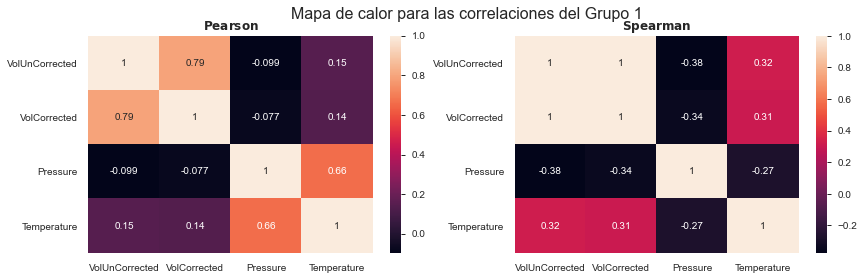

In [42]:
numer = grupo1.select_dtypes([float])
#objeto= grupo1.select_dtypes(['object'])

fig = plt.figure(figsize =(14,4))
plt.subplot(1,2,1)
sns.heatmap(numer.corr(method ='pearson'),annot = True)
plt.title(r'$\bf{Pearson}$')
plt.subplot(1,2,2)
sns.heatmap(numer.corr(method ='spearman'),annot = True)
plt.title(r'$\bf{Spearman}$')
fig.suptitle('Mapa de calor para las correlaciones del Grupo 1', fontsize=16)

### Grupo 2

In [22]:
lista2 =  lista = [151, 152, 155, 156, 158, 159, 161, 162, 163, 164, 166, 169, 170]
grupo2 = daily[daily['id_sitio'].isin(lista2)]
grupo2.head()

,id_sitio,Daily_Date,VolUnCorrected,VolCorrected,Pressure,Temperature,id_RTU
1,163,2013-08-21 23:59:59,1434.93,24170.80,NaN,NaN,3
39,151,2013-08-19 23:59:59,995.00,16940.71,NaN,NaN,17
40,152,2013-08-19 23:59:59,650.00,10917.31,NaN,NaN,2
43,155,2013-08-19 23:59:59,888.33,15146.56,NaN,NaN,16
44,156,2013-08-19 23:59:59,463.81,7932.45,NaN,NaN,12


In [23]:
IDs_Sitio_grupo2 = grupo2.id_sitio.unique()
print('Hay {} id_sitio diferentes en la base de datos del grupo 2'.format(len(IDs_Sitio_grupo2)))
print('Estos son:\n')
print(IDs_Sitio_grupo2)

Hay 13 id_sitio diferentes en la base de datos del grupo 2
Estos son:

[163 151 152 155 156 158 159 161 162 164 166 169 170]


Text(0.5, 0.98, 'Mapa de calor para las correlaciones del Grupo 2')

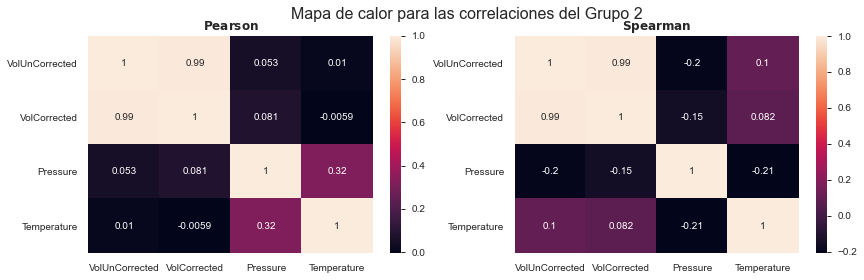

In [43]:
numer = grupo2.select_dtypes([float])
#objeto= grupo1.select_dtypes(['object'])

fig = plt.figure(figsize =(14,4))
plt.subplot(1,2,1)
sns.heatmap(numer.corr(method ='pearson'), annot = True)
plt.title(r'$\bf{Pearson}$')
plt.subplot(1,2,2)
sns.heatmap(numer.corr(method ='spearman'), annot = True)
plt.title(r'$\bf{Spearman}$')
fig.suptitle('Mapa de calor para las correlaciones del Grupo 2', fontsize=16)

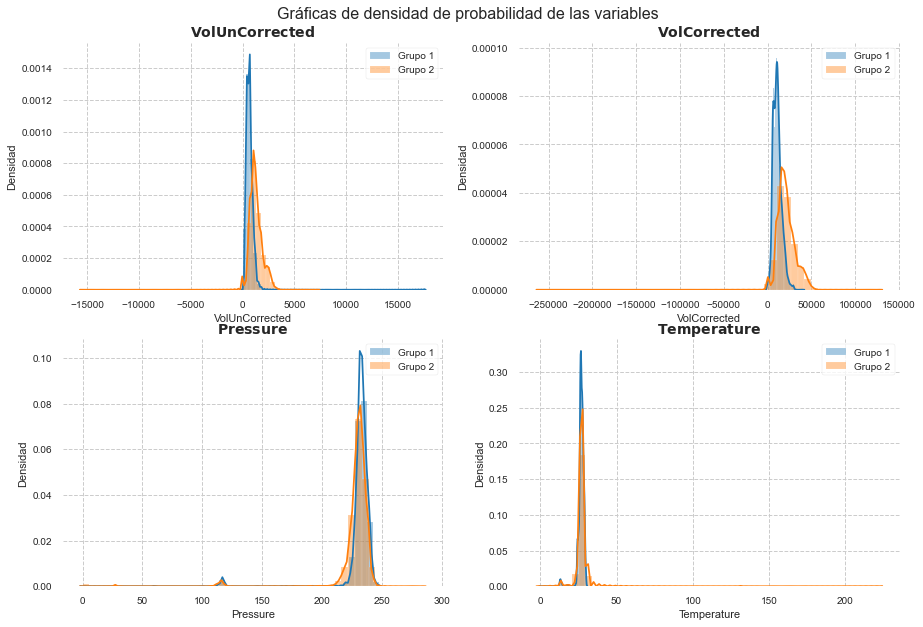

In [25]:
variables = ['VolUnCorrected','VolCorrected','Pressure','Temperature']
f = plt.figure(figsize=(15,10))
f.suptitle('Gráficas de densidad de probabilidad de las variables', y=0.93, fontsize=16)

cont = 1
for v in variables:
    if cont == 2:
        x = 'PSI'
    elif cont == 3:
        x = '°C'
    else:
        x = ''
        
    axarr = plt.subplot(2,2,cont)    
    axarr.set_title(r'$\bf{}$'.format(v), fontsize=14)
    axarr.set_xlabel(x)
    axarr.set_ylabel('Densidad')
    axarr.grid(linestyle='--',b=True, which='major')

    sns.distplot(grupo1[v],label='Grupo 1')
    sns.distplot(grupo2[v],label='Grupo 2')
    axarr.legend()
    cont = cont + 1

## Aquí se crea una base de datos para cada sitio de interés

In [26]:
d={}
for i in range(151,171,1):
    if i!=168:
        d['daily_id_sitio_'+str(i)] = (daily[daily['id_sitio']==i]).copy()
        d['daily_id_sitio_'+str(i)]['Daily_Date'] = pd.to_datetime(d['daily_id_sitio_'+str(i)]['Daily_Date'])
        N=d['daily_id_sitio_'+str(i)].shape
        print('El tamaño de la base de datos del id_sitio {} es {}'.format(i,N))   
    

El tamaño de la base de datos del id_sitio 151 es (1619, 7)
El tamaño de la base de datos del id_sitio 152 es (1605, 7)
El tamaño de la base de datos del id_sitio 153 es (1618, 7)
El tamaño de la base de datos del id_sitio 154 es (1619, 7)
El tamaño de la base de datos del id_sitio 155 es (1383, 7)
El tamaño de la base de datos del id_sitio 156 es (1620, 7)
El tamaño de la base de datos del id_sitio 157 es (1617, 7)
El tamaño de la base de datos del id_sitio 158 es (1615, 7)
El tamaño de la base de datos del id_sitio 159 es (1560, 7)
El tamaño de la base de datos del id_sitio 160 es (1613, 7)
El tamaño de la base de datos del id_sitio 161 es (1618, 7)
El tamaño de la base de datos del id_sitio 162 es (1588, 7)
El tamaño de la base de datos del id_sitio 163 es (1618, 7)
El tamaño de la base de datos del id_sitio 164 es (1620, 7)
El tamaño de la base de datos del id_sitio 165 es (1618, 7)
El tamaño de la base de datos del id_sitio 166 es (1621, 7)
El tamaño de la base de datos del id_sit

In [27]:
for i in range(151,171,1):
    if i!=168:
        uniq=d['daily_id_sitio_'+str(i)]['id_RTU'].unique()
        print('El id_sitio {} está asociado al id_RTU {}'.format(i,uniq))  

El id_sitio 151 está asociado al id_RTU [17.0]
El id_sitio 152 está asociado al id_RTU [2.0]
El id_sitio 153 está asociado al id_RTU [8.0]
El id_sitio 154 está asociado al id_RTU [13.0]
El id_sitio 155 está asociado al id_RTU [16.0]
El id_sitio 156 está asociado al id_RTU [12.0]
El id_sitio 157 está asociado al id_RTU [5.0]
El id_sitio 158 está asociado al id_RTU [6.0]
El id_sitio 159 está asociado al id_RTU [4.0]
El id_sitio 160 está asociado al id_RTU [11.0]
El id_sitio 161 está asociado al id_RTU [10.0]
El id_sitio 162 está asociado al id_RTU [18.0]
El id_sitio 163 está asociado al id_RTU [3.0]
El id_sitio 164 está asociado al id_RTU [9.0]
El id_sitio 165 está asociado al id_RTU [15.0 nan]
El id_sitio 166 está asociado al id_RTU [1.0]
El id_sitio 167 está asociado al id_RTU [7.0]
El id_sitio 169 está asociado al id_RTU [19.0]
El id_sitio 170 está asociado al id_RTU [20.0]


In [28]:
mytable(d['daily_id_sitio_165'])

,% de datos nulos,% de ceros,Tipo de datos,# de valores diferentes
id_sitio,0.000000,0.000000,object,1
Daily_Date,0.000000,0.000000,datetime64[ns],1614
VolUnCorrected,0.000000,2.101360,float64,1156
VolCorrected,0.000000,2.224969,float64,1575
Pressure,0.247219,0.000000,float64,822
Temperature,0.247219,0.061805,float64,405
id_RTU,0.123609,0.000000,object,1
